In [2]:
from itertools import product

# set dimensions
pitch_range = range(1, 6)
speed_range = range(1, 6)
energy_range = range(1, 6)
glottalization_range = ["1-breathy_voice", "2-slack_voice", "3-modal_voice", "4-stiff_voice", "5-creaky_voice"]
tenseness_range = ["1-laxest_articulated", "2-lax_articulated", "3-moderate_articulated", "4-tense_articulated", "5-tensest_articulated"]
resonance_range = ["1-chest_voice", "2-epiglottal_voice", "3-guttural_voice", "4-oral_voice", "5-pharyngeal_voice", "6-nasal_voice", "7-head_voice", "8-mix_voice"]

# list for all combinations
combinations = []

# use itertools.product to generate all combinations
for pitch, speed, energy, glottalization, tenseness, resonance in product(pitch_range, speed_range, energy_range, glottalization_range, tenseness_range, resonance_range):
    # check the vocalizational impractical combinations
    if (pitch == 1 and resonance in ["4-oral_voice", "5-pharyngeal_voice", "6-nasal_voice", "7-head_voice", "8-mix_voice"]) or \
        (pitch == 2 and resonance in ["5-pharyngeal_voice", "6-nasal_voice", "7-head_voice", "8-mix_voice"]) or \
        (pitch == 5 and resonance in ["1-chest_voice", "2-epiglottal_voice", "3-guttural_voice", "4-oral_voice"]) or \
        (pitch == 1 and energy == 5) or \
        (speed == 5 and tenseness == "5-tensest_articulated") or \
        (energy == 4 and resonance == "2-epiglottal_voice") or \
        (energy == 5 and resonance in ["2-epiglottal_voice", "3-guttural_voice"]) or \
        (glottalization == "1-breathy_voice" and resonance in ["7-head_voice", "8-mix_voice"]):
        continue

    combination = (pitch, speed, energy, glottalization, tenseness, resonance)

    if combination not in combinations:
        
        combinations.append(combination)


In [5]:
import pandas as pd

# pd.set_option('display.width', None)
# pd.set_option('display.max_columns', None)

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 100)
df = pd.DataFrame(combinations, columns=['pitch', 'speed', 'energy', 'glottalization', 'tenseness', 'resonance'])

print(df)


       pitch  speed  energy   glottalization               tenseness           resonance
0          1      1       1  1-breathy_voice    1-laxest_articulated       1-chest_voice
1          1      1       1  1-breathy_voice    1-laxest_articulated  2-epiglottal_voice
2          1      1       1  1-breathy_voice    1-laxest_articulated    3-guttural_voice
3          1      1       1  1-breathy_voice       2-lax_articulated       1-chest_voice
4          1      1       1  1-breathy_voice       2-lax_articulated  2-epiglottal_voice
...      ...    ...     ...              ...                     ...                 ...
13915      5      5       5   5-creaky_voice  3-moderate_articulated         8-mix_voice
13916      5      5       5   5-creaky_voice     4-tense_articulated  5-pharyngeal_voice
13917      5      5       5   5-creaky_voice     4-tense_articulated       6-nasal_voice
13918      5      5       5   5-creaky_voice     4-tense_articulated        7-head_voice
13919      5      5  

In [6]:
def simplify(content):
    return content.split('-')[0]

df['glottalization'] = df['glottalization'].apply(simplify)
df['tenseness'] = df['tenseness'].apply(simplify)
df['resonance'] = df['resonance'].apply(simplify)

print(df)


       pitch  speed  energy glottalization tenseness resonance
0          1      1       1              1         1         1
1          1      1       1              1         1         2
2          1      1       1              1         1         3
3          1      1       1              1         2         1
4          1      1       1              1         2         2
...      ...    ...     ...            ...       ...       ...
13915      5      5       5              5         3         8
13916      5      5       5              5         4         5
13917      5      5       5              5         4         6
13918      5      5       5              5         4         7
13919      5      5       5              5         4         8

[13920 rows x 6 columns]


In [7]:
# check duplicates
duplicates = df.duplicated()
print("Number of duplicate rows = ", duplicates.sum())


Number of duplicate rows =  0


In [8]:
# 1. 统计总共有多少种组合
num_combinations = len(df)
print(f'There are {num_combinations} combinations')


There are 13920 combinations


In [9]:
# 对每一列的值计数，并排序
pitch_counts = df['pitch'].value_counts().sort_index()
speed_counts = df['speed'].value_counts().sort_index()
energy_counts = df['energy'].value_counts().sort_index()
glottalization_counts = df['glottalization'].value_counts().sort_index().rename(lambda x: int(x.split('-')[0]))
tenseness_counts = df['tenseness'].value_counts().sort_index().rename(lambda x: int(x.split('-')[0]))
resonance_counts = df['resonance'].value_counts().sort_index().rename(lambda x: int(x.split('-')[0]))

# 创建新的 DataFrame 来存储结果，并移除 index 名称
results = pd.DataFrame({
    'pitch': pitch_counts,
    'speed': speed_counts,
    'energy': energy_counts,
    'glottalization': glottalization_counts,
    'tenseness': tenseness_counts,
    'resonance': resonance_counts
})

results.index.name = None
results.columns.name = None
results = results.fillna(0)
results = results.astype(int)

print(results)


   pitch  speed  energy  glottalization  tenseness  resonance
1   1320   2900    3096            2208       2900       2280
2   2040   2900    3096            2928       2900       1440
3   4200   2900    3096            2928       2900       1920
4   4200   2900    2616            2928       2900       1800
5   2160   2320    2016            2928       2320       1800
6      0      0       0               0          0       1800
7      0      0       0               0          0       1440
8      0      0       0               0          0       1440


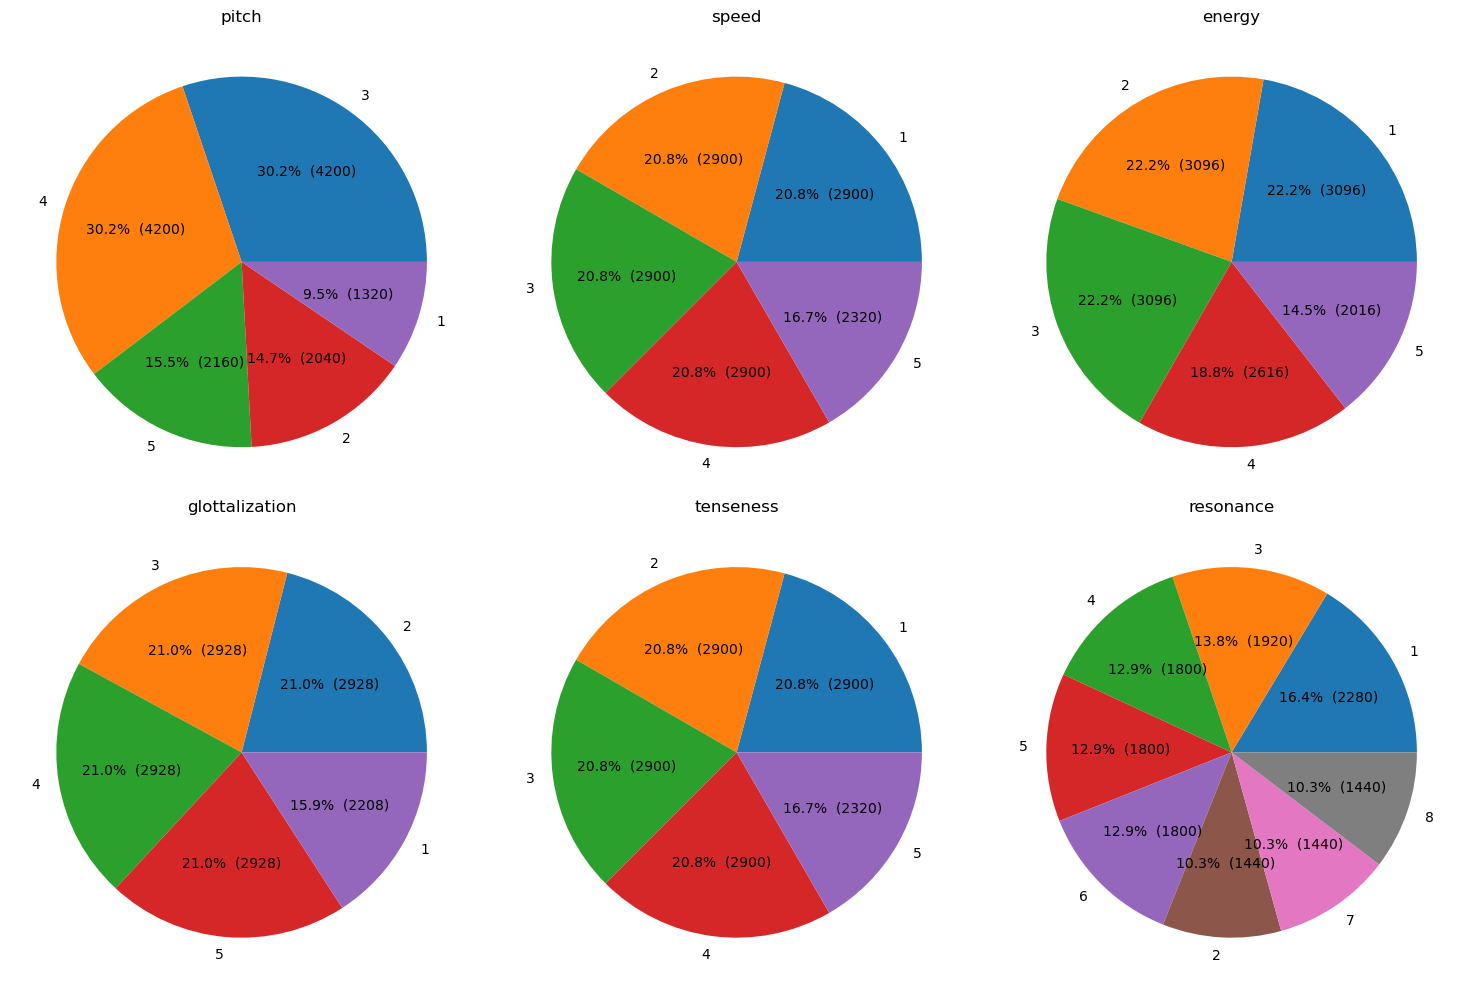

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 自定义标签格式函数
def make_autopct(counts):
    def my_autopct(pct):
        total = sum(counts)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

for ax, column in zip(axs.flatten(), df.columns):
    counts = df[column].value_counts()
    ax.pie(counts, labels=counts.index, autopct=make_autopct(counts))
    ax.set_title(column)

plt.tight_layout()
plt.show()



In [12]:

import ipywidgets as widgets
from IPython.display import display

# 创建一个按钮来添加标记
add_marker_button = widgets.Button(description="添加标记")

# 创建一个输入框来输入标记
marker_input = widgets.IntText(value=0, description='标记')

# 创建一个输出框来显示标记
marker_output = widgets.Output()

# 定义一个函数来处理按钮的点击事件
def on_button_clicked(b):
    with marker_output:
        # 清空输出
        marker_output.clear_output()

        # 获取输入的标记
        marker = marker_input.value

        # 添加标记
        df.loc[marker, 'marker'] = '对齐'

        # 打印 DataFrame
        print(df)

# 将这个函数绑定到按钮的点击事件
add_marker_button.on_click(on_button_clicked)

# 显示输入框，按钮和输出框
display(marker_input, add_marker_button, marker_output)


IntText(value=0, description='标记')

Button(description='添加标记', style=ButtonStyle())

Output()